# Лабораторная работа №1

**Леденцы**

V1: освежить дыхание

V2: чувствовать себя увереннее

V3: освежить полость рта

V4: избавиться от неприятного вкуса

V5: заменитель сладкого

V6: хочется сладкого

V7: помогают сконцентрироваться

V8: отвлечься и подумать

V9: облегчить боль в горле

V10: избавиться от заложенности носа

V11: улучшить самочувствие

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster #  Активируем 3 процедуры иерархического кластерного анализа
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

## Импорт данных

In [2]:
df = pd.read_csv('Леденцы.dat', sep=';')

print("Размер датасета:", df.shape)

print("\nПервые 5 строк данных:")
print(df.head())

print("\nОписательная статистика:")
print(df.describe())

Размер датасета: (338, 11)

Первые 5 строк данных:
   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11
0   4   5   5   5   3   3   3   3   3    3    3
1   5   4   5   5   3   3   3   3   3    3    3
2   5   5   4   5   3   3   3   3   3    3    3
3   5   4   5   5   3   3   3   3   3    3    3
4   4   5   5   5   3   3   3   3   3    3    3

Описательная статистика:
               V1          V2          V3          V4          V5          V6  \
count  338.000000  338.000000  338.000000  338.000000  338.000000  338.000000   
mean     3.544379    3.526627    3.517751    3.411243    3.207101    3.204142   
std      0.955748    0.956410    0.990150    0.992311    0.867314    0.869725   
min      2.000000    2.000000    2.000000    2.000000    2.000000    2.000000   
25%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
50%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
75%      5.000000    5.000000    5.000000    4.000000    3.000000   

**Общая информация о данных**
* Количество характеристик: 11 переменных (V1-V11)
* Шкала оценок: от 2 до 5 баллов
* Медиана по большинству переменных = 3, что указывает на преобладание нейтральных оценок

In [3]:
invalid_mask = ((df < 2) | (df > 5))
invalid_counts = invalid_mask.sum()
print("Количество недопустимых значений (меньше 2 или больше 5):")
print(invalid_counts)

Количество недопустимых значений (меньше 2 или больше 5):
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64


<Figure size 1400x1000 with 0 Axes>

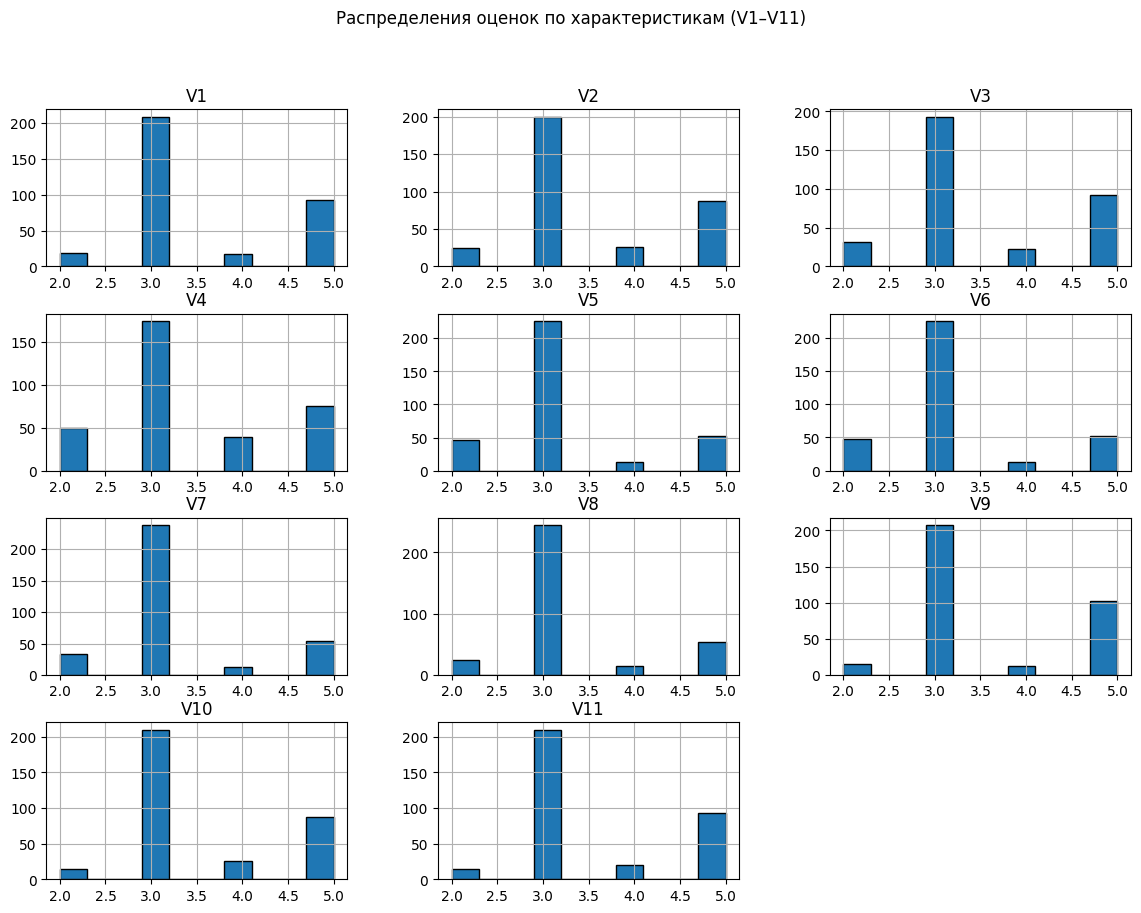

In [4]:
# распределения оценок
plt.figure(figsize=(14, 10))
df.hist(bins=10, figsize=(14, 10), edgecolor='black')
plt.suptitle('Распределения оценок по характеристикам (V1–V11)')
plt.show()

Количество выбросов по каждой переменной:
V1       0
V2       0
V3       0
V4       0
V5     112
V6     113
V7     100
V8      94
V9       0
V10      0
V11      0
dtype: int64


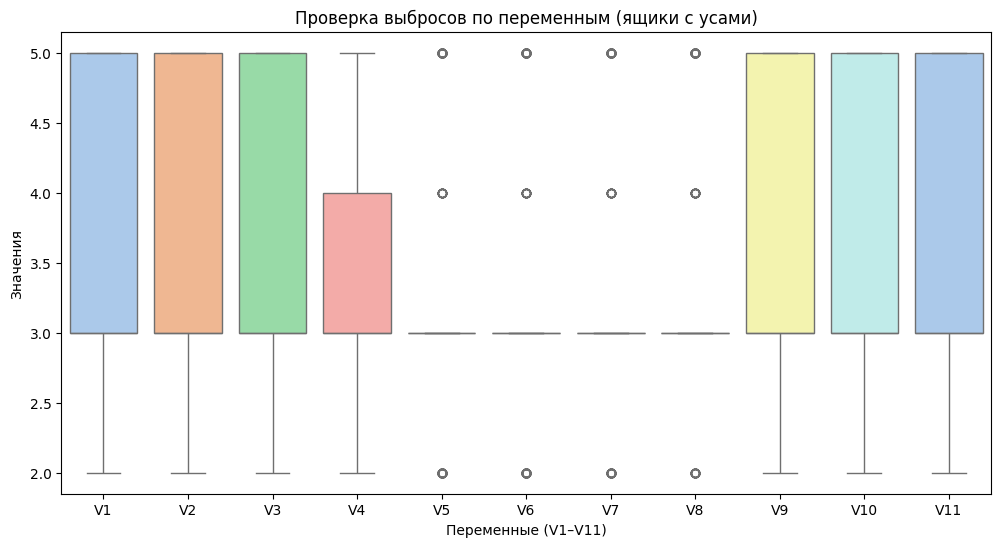

In [5]:
# вычисляем Q1, Q3 и IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# определяем границы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# создаем булеву маску выбросов
outliers = ((df < lower_bound) | (df > upper_bound))

# считаем количество выбросов по каждой переменной
outlier_counts = outliers.sum()
print("Количество выбросов по каждой переменной:")
print(outlier_counts)

# визуализация — ящик с усами для всех переменных
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="v", palette="pastel")
plt.title("Проверка выбросов по переменным (ящики с усами)")
plt.xlabel("Переменные (V1–V11)")
plt.ylabel("Значения")
plt.show()


Проверка выбросов методом межквартильного размаха показала наличие крайних значений в переменных V5–V8.
Однако, поскольку данные имеют дискретную шкалу (от 2 до 5), такие значения соответствуют допустимому диапазону и не являются выбросами в статистическом или смысловом смысле.
Следовательно, данные можно считать чистыми, стандартизация проводится без исключения наблюдений.

# Стандартизируем данные

Чтобы переменные с разной дисперсией вносили равный вклад в кластеризацию проведена стандартизация, иначе алгоритм учитывал бы в первую очередь переменные с большим разбросом значений (как например, V4 имеет std=0.99, V7 имеет std=0.84)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Построение дендрограммы

Метод: Ward

Метрика: Евклидово расстояние


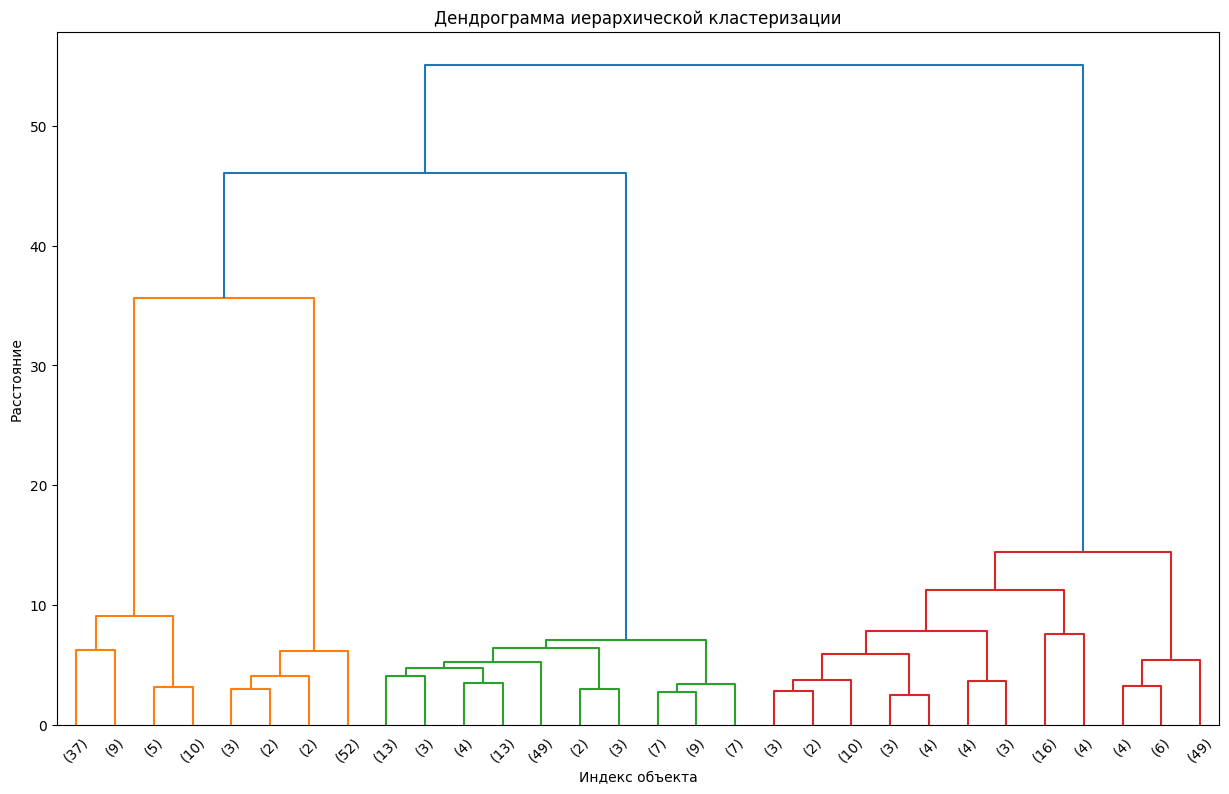

In [ ]:
# Выполняем иерархическую кластеризацию с помощью алгоритм минимизации дисперсии Уорда.
link = linkage(data_scaled, 'ward', 'euclidean')

# Cтроим дендрограмму
plt.figure(figsize=(15, 9))
dendrogram(link,
           truncate_mode='lastp', # сжатие в листовые узлы т.к. громозкая дендрограмма
           orientation='top',
           distance_sort='descending') # отображение. первым идёт потом с макс расстоянием между его потомками
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индекс объекта')
plt.ylabel('Расстояние')
plt.show()

# Каменистая осыпь

На графике "Каменистая осыпь" показывается зависимость расстояний между кластерами от шага объединения (обратного). На графике находим момент, начиная с которого расстояние перестанет значительно меняться.

Text(0, 0.5, 'Евклидово расстояние')

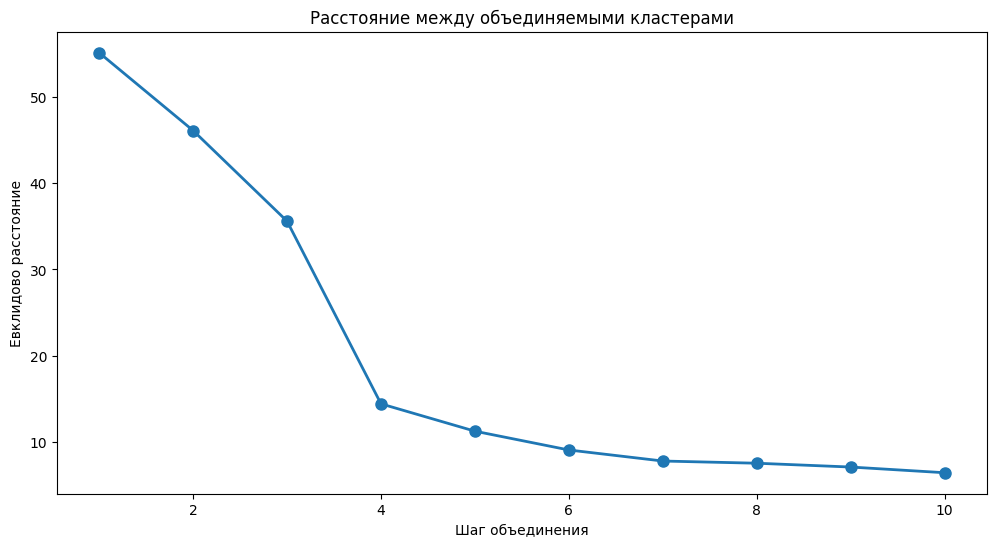

In [ ]:
# Берем расстояния из linkage матрицы (последний столбец)
distances = link[:, 2]

# Переворачиваем массив для правильного отображения
dist_rev = distances[::-1]

# Создаем индексы шагов (ограничиваем до 10 для наглядности)
idxs = range(1, len(dist_rev) + 1)

plt.figure(figsize=(12, 6))
plt.plot(idxs[:10], dist_rev[:10], marker='o', linewidth=2, markersize=8)
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Евклидово расстояние')

Анализ дендрограммы и графика каменистой осыпи показал, что оптимальным является разделение на четыре кластера, что соответствует точке "локтя" на графике расстояний между объединяемыми кластерами.

# Интерпретация результатов

In [ ]:
# Формируем метки кластеров
n_clusters = 4
clusters = fcluster(link, n_clusters, criterion='maxclust')

# Добавляем к исходным данным
df['Cluster'] = clusters

In [ ]:
print("Примеры строк по кластерам:\n")
for c in np.unique(clusters):
    print(f"\n=== Кластер {c} ===")
    print(df[df['Cluster'] == c].head(5))

Примеры строк по кластерам:


=== Кластер 1 ===
     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  Cluster
110   3   2   2   2   3   2   2   3   5    5    5        1
111   3   3   3   3   3   3   3   3   5    5    5        1
112   2   4   4   4   2   2   2   3   5    5    5        1
113   3   3   3   3   3   3   3   3   5    5    5        1
114   3   3   3   3   3   3   3   3   5    5    5        1

=== Кластер 2 ===
   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  Cluster
0   4   5   5   5   3   3   3   3   3    3    3        2
1   5   4   5   5   3   3   3   3   3    3    3        2
2   5   5   4   5   3   3   3   3   3    3    3        2
3   5   4   5   5   3   3   3   3   3    3    3        2
4   4   5   5   5   3   3   3   3   3    3    3        2

=== Кластер 3 ===
     V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  Cluster
279   3   3   3   3   3   3   5   5   3    3    3        3
280   3   3   3   3   3   3   5   5   3    3    3        3
281   3   3   3   3   3   3   5   5   3  

In [ ]:
cluster_means = df.groupby('Cluster').mean()
print("Средние оценки по кластерам:")
print(cluster_means)

Средние оценки по кластерам:
               V1        V2        V3        V4        V5        V6        V7  \
Cluster                                                                         
1        2.824074  2.833333  2.768519  2.620370  2.611111  2.583333  2.750000   
2        4.845455  4.800000  4.836364  4.681818  3.036364  3.036364  3.000000   
3        3.000000  2.966102  2.966102  2.915254  2.915254  2.949153  4.915254   
4        3.000000  3.000000  3.000000  3.000000  4.852459  4.852459  3.000000   

               V8        V9       V10       V11  
Cluster                                          
1        2.916667  4.953704  4.814815  4.861111  
2        2.990909  3.072727  3.045455  3.045455  
3        4.915254  3.000000  3.000000  3.000000  
4        2.918033  2.754098  2.754098  2.754098  


# Выводы

В результате иерархического кластерного анализа, респондентов можно выделить **четыре** основных кластера по целям потребления леденцов:

**Кластер 1 — «Леденцы для облегчения состояния» (V9-V11)**
Сюда входят респонденты, которые чаще всего употребляют леденцы для облегчения боли в горле, заложенности носа и улучшения самочувствия.  
Средние оценки по этим переменным значительно выше, чем по остальным.  
Вывод: Это «функциональные потребители», для которых леденцы выполняют скорее лечебную или поддерживающую функцию, чем развлекательную.

**Кластер 2 — «Леденцы для свежести и уверенности» (V1-V4)**
Основная мотивация — освежение дыхания, ощущение уверенности, чистота полости рта, устранение неприятного вкуса.  
Средние оценки по этим признакам высоки.  
Вывод: Это «социально-ориентированные потребители», для которых леденцы являются инструментом поддержания комфорта в общении.

**Кластер 3 — «Леденцы для концентрации и отдыха» (V7-V8)**
Основные мотивации: помощь в концентрации, небольшой отдых и отвлечение.  
Вывод: Это «когнитивно-ориентированные потребители», которые используют леденцы как способ расслабления или повышения продуктивности.

**Кластер 4 — «Леденцы как сладкое удовольствие» (V5-V6)**
Доминируют показатели «заменитель других кондитерских изделий» и «когда хочется чего-нибудь сладкого».  
Вывод: Эти потребители относятся к категории людей, для которых леденцы — просто приятное лакомство, источник сладости, без функциональной цели.

